# An analysis of factors affecting product sales of 'ABC'

### Author :  George M Cherian

##### *This notebook analyzes the sales of 7 products A,B,C,D,E,F and G manufactured by a company 'ABC' and points out the correlation between multiple factors that have affected the overall sales of the products*

In [1]:
# Importing the modules required to perform the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Loading the dataset into a DataFrame 'df'
df = pd.read_csv("relevel.csv")


In [4]:
# Converting the "Sales ('000, USD)" column's contents to the actual arithmetic value
df['Sales'] = df['Sales'].apply(lambda x : x*1000)

In [5]:
#Number of unique entries for each column
df.nunique()

Order ID         150
Customer Name     20
Product            7
Region             5
Sales             26
Registered At    148
Purchased At     150
Refunded           2
Origin             9
dtype: int64

In [6]:
#The DataFrame 'df'
df

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
0,1,Jones,A,South,500000,12/01/18 02:00,12/06/18 18:59,False,referral
1,2,Kivell,B,East,400000,12/01/18 12:23,12/06/18 19:54,False,display
2,3,James,G,North,100000,12/01/18 13:49,13/06/18 16:37,False,social
3,4,Jack,F,West,200000,12/01/18 16:07,14/06/18 14:30,False,social
4,5,Anny,B,Central,250000,12/01/18 18:25,14/06/18 15:43,True,other
...,...,...,...,...,...,...,...,...,...
145,146,Thompson,C,South,300000,22/02/18 21:25,01/11/18 15:36,False,social
146,147,Mathew,C,Central,110000,23/02/18 11:40,06/11/18 19:41,False,organic_search
147,148,Gill,F,East,335000,23/02/18 12:03,09/11/18 20:06,False,paid_search
148,149,Amy,A,South,235000,23/02/18 13:54,12/11/18 19:17,False,social


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       150 non-null    int64 
 1   Customer Name  150 non-null    object
 2   Product        150 non-null    object
 3   Region         150 non-null    object
 4   Sales          150 non-null    int64 
 5   Registered At  150 non-null    object
 6   Purchased At   150 non-null    object
 7   Refunded       150 non-null    bool  
 8   Origin         150 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 9.6+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order ID,150.0,76.040000,44.358346,1.0,38.25,75.5,113.75,190.0
Sales,150.0,289033.333333,127018.860126,100000.0,200000.00,300000.0,350000.00,550000.0


## Some basic plots highlighting the key features of the dataset

### Plot1 : A countplot depicting the total no:of units sold for each product

Text(0.5, 1.0, 'No:of units sold for each product')

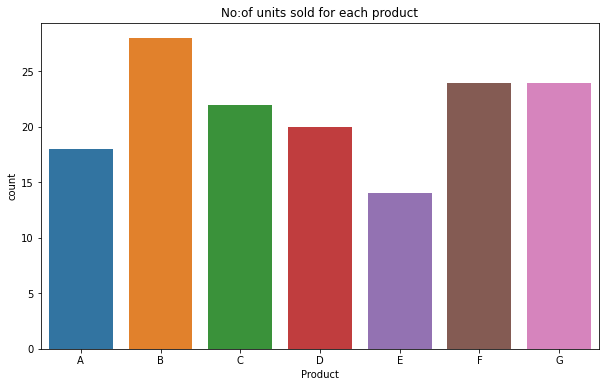

In [9]:
plt.figure(figsize=(10,6))
plot = sns.countplot(data=df,x='Product',order=['A','B','C','D','E','F','G'])
plot.set_title('No:of units sold for each product')


### Plot 2 : A countplot depicting the number of products sold per region

Text(0.5, 1.0, 'Total Products sold per Region')

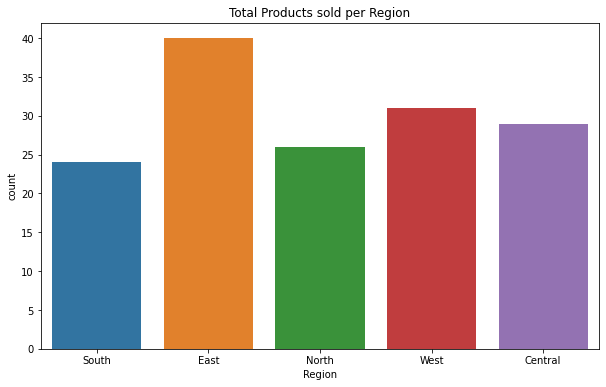

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Region').set_title('Total Products sold per Region')

In [11]:
temp = df.groupby('Product')

### Plot3 : A Pie Chart showing the distribution of total sales among the seven products

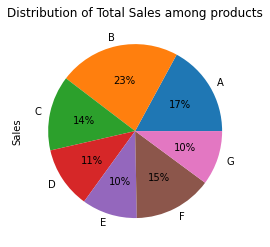

In [12]:
temp['Sales'].sum().plot(kind='pie',title='Distribution of Total Sales among products',autopct='%1.0f%%')



### Plot4 : A Bar Plot depicting the median price of each product

Text(0, 0.5, 'Price ($)')

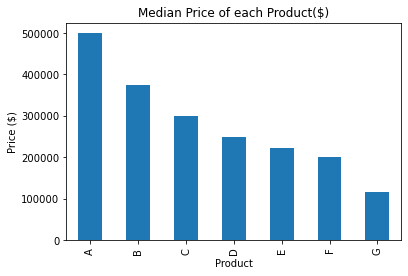

In [13]:
temp['Sales'].median().plot(kind='bar',title='Median Price of each Product($)')
plt.ylabel('Price ($)')


### Plot5: A Bar Plot depicitng the mean price of each product

Text(0, 0.5, 'Price ($)')

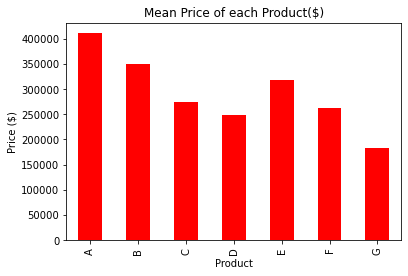

In [14]:
temp['Sales'].mean().plot(kind='bar',color='Red',title='Mean Price of each Product($)')
plt.ylabel('Price ($)')

### Plot6 : A Bar Plot depicitng the number of refunds per product

Text(0, 0.5, 'Number of refunds')

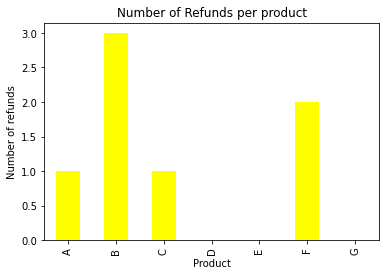

In [15]:
temp['Refunded'].sum().plot(kind='bar',color='Yellow',title='Number of Refunds per product')
plt.ylabel('Number of refunds')

In [16]:
temp = df.groupby('Region')

###  Plot7 : A Bar Plot depicting the number of customers per region

Text(0, 0.5, 'Number of customers')

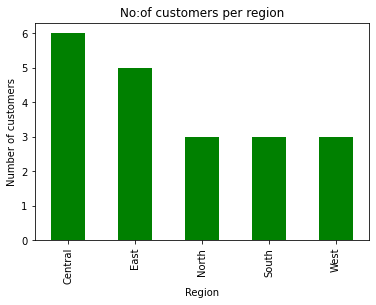

In [17]:
temp['Customer Name'].nunique().plot(kind='bar',color='Green',title='No:of customers per region')
plt.ylabel('Number of customers')

 ### Plot8 : A Pie Chart depicting the distribution of total sales (revenue) among the various                       regions

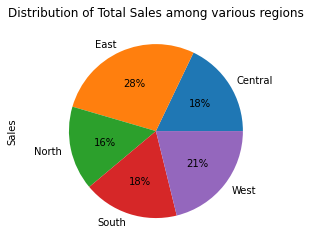

In [18]:
plot = temp['Sales'].sum().plot(kind='pie',title='Distribution of Total Sales among various regions',autopct='%1.0f%%')
plot.yaxis.labelpad = 30

### Plot9 : A countplot depicting product sales per origin/medium

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

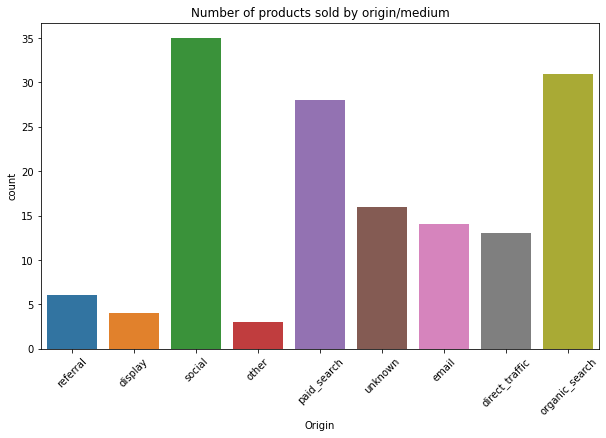

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Origin').set_title('Number of products sold by origin/medium')
plt.xticks(rotation=45)

### Plot10 : A countplot showing the breakup of products sold per region

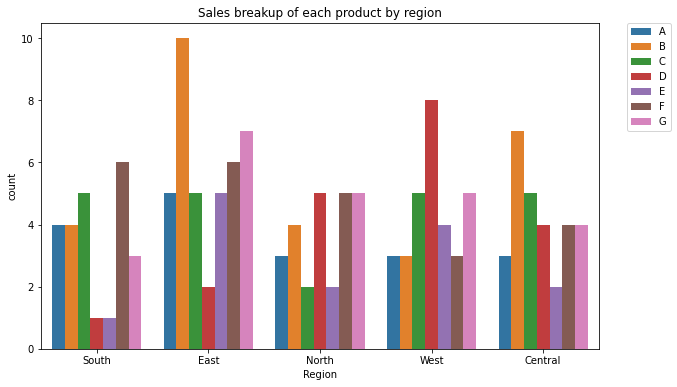

In [20]:
plt.figure(figsize=(10,6))
pl = sns.countplot(data=df,x='Region',hue='Product',hue_order=['A','B','C','D','E','F','G'])
pl.set_title('Sales breakup of each product by region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


### Plot11 : A countplot showing the breakup of products sold per source/medium

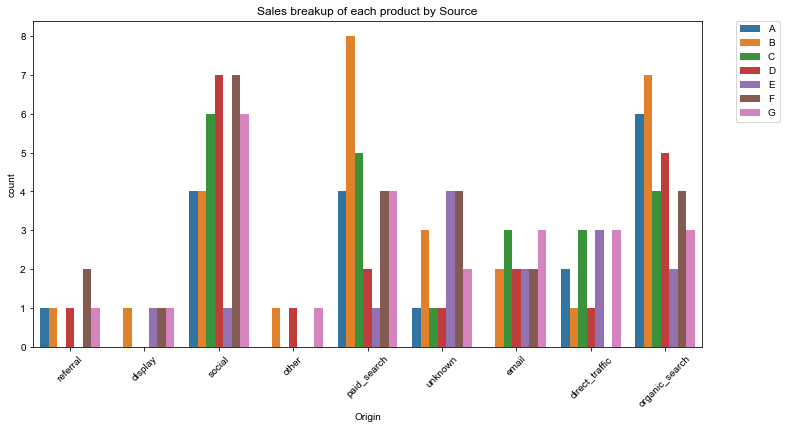

In [21]:
plt.figure(figsize=(12,6))
pl = sns.countplot(data=df,x='Origin',hue='Product',hue_order=['A','B','C','D','E','F','G'])
pl.set_title('Sales breakup of each product by Source')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(rotation=45)
sns.set(font_scale=1.1)

### Plot12 : A countplot depicting the relative success of each origin/medium in each region

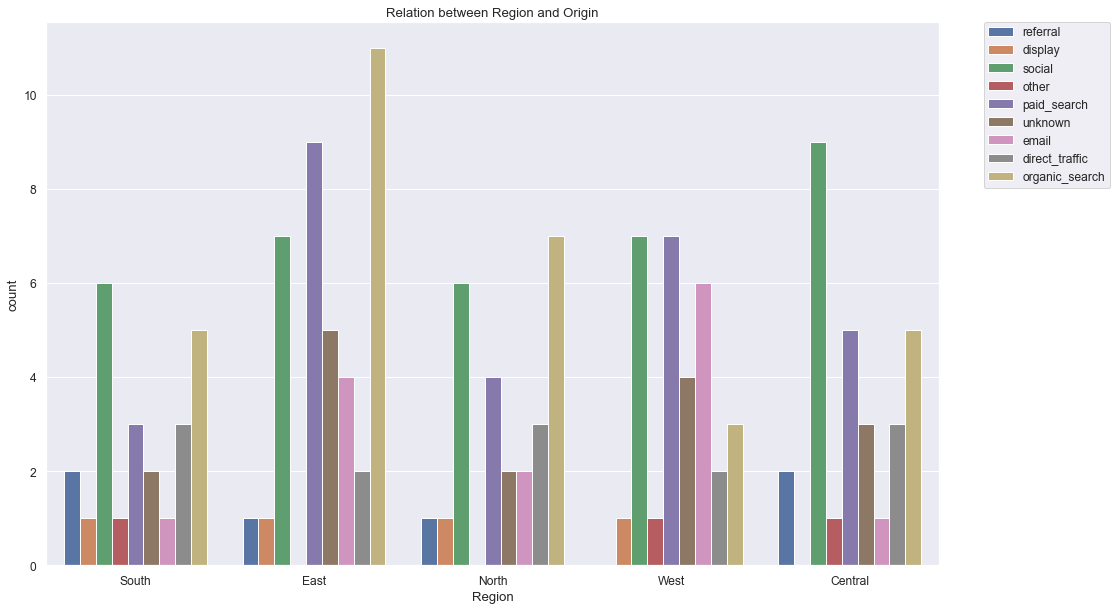

In [22]:
plt.figure(figsize=(16,10))
pl = sns.countplot(data=df,x='Region',hue='Origin')
pl.set_title('Relation between Region and Origin')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
sns.set(font_scale=1.2)

### Plot13 : A countplot showcasing the breakup of products purchased per customer

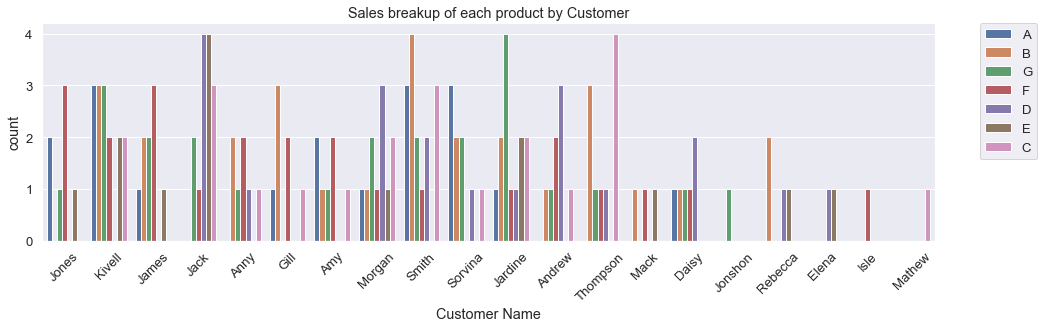

In [23]:
plt.figure(figsize=(16,4))
pl = sns.countplot(data=df,x='Customer Name',hue='Product')
pl.set_title('Sales breakup of each product by Customer')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(rotation=45)
sns.set(font_scale=1.2)

In [24]:
df[df['Product']=='A']

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
0,1,Jones,A,South,500000,12/01/18 02:00,12/06/18 18:59,False,referral
6,7,Amy,A,South,500000,15/01/18 17:14,15/06/18 14:04,False,paid_search
11,12,James,A,North,520000,16/01/18 13:16,18/06/18 13:58,False,social
20,21,Daisy,A,North,210000,19/01/18 11:26,21/06/18 12:39,False,direct_traffic
30,31,Kivell,A,East,350000,22/01/18 17:11,02/07/18 13:40,False,social
47,48,Gill,A,East,120000,29/01/18 02:00,13/07/18 19:46,False,paid_search
48,49,Kivell,A,East,500000,29/01/18 10:35,13/07/18 20:14,False,paid_search
61,62,Jardine,A,East,500000,30/01/18 18:06,30/07/18 14:02,False,organic_search
74,75,Sorvina,A,West,500000,02/02/18 16:44,08/08/18 21:14,False,social
79,80,Smith,A,Central,350000,05/02/18 18:36,15/08/18 19:09,False,organic_search


In [25]:
df[df['Product']=='B']

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
1,2,Kivell,B,East,400000,12/01/18 12:23,12/06/18 19:54,False,display
4,5,Anny,B,Central,250000,12/01/18 18:25,14/06/18 15:43,True,other
8,9,Smith,B,Central,400000,15/01/18 19:51,15/06/18 21:32,False,social
17,18,Mack,B,Central,310000,18/01/18 20:02,20/06/18 18:31,False,direct_traffic
22,23,Amy,B,South,400000,19/01/18 16:51,25/06/18 19:33,False,paid_search
32,33,Morgan,B,North,400000,22/01/18 19:14,03/07/18 12:26,False,social
45,46,Andrew,B,West,400000,26/01/18 18:13,13/07/18 11:53,False,paid_search
49,50,Thompson,B,South,350000,29/01/18 11:26,13/07/18 21:58,False,organic_search
52,53,Smith,B,Central,300000,29/01/18 15:09,18/07/18 18:48,False,unknown
53,54,Thompson,B,South,400000,29/01/18 17:13,18/07/18 20:24,False,paid_search


In [26]:
df[df['Product']=='C']

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
23,24,Gill,C,East,320000,19/01/18 17:23,26/06/18 12:51,False,social
27,28,Jardine,C,East,300000,22/01/18 13:18,29/06/18 17:54,False,organic_search
31,32,Sorvina,C,West,110000,22/01/18 17:43,02/07/18 17:20,False,email
51,52,Smith,C,Central,110000,29/01/18 12:15,17/07/18 20:12,False,social
63,64,Thompson,C,South,110000,31/01/18 13:33,30/07/18 20:30,False,organic_search
67,68,Amy,C,South,300000,31/01/18 21:00,01/08/18 20:22,False,direct_traffic
69,70,Andrew,C,West,220000,01/02/18 17:10,03/08/18 17:41,False,paid_search
75,76,Jardine,C,East,300000,02/02/18 20:42,10/08/18 13:01,False,direct_traffic
85,86,Jack,C,West,320000,06/02/18 20:18,20/08/18 14:41,False,organic_search
97,98,Kivell,C,East,320000,08/02/18 17:20,30/08/18 12:32,False,social


In [27]:
df[df['Product']=='D']

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
9,10,Sorvina,D,West,320000,16/01/18 02:00,18/06/18 12:46,False,unknown
16,17,Thompson,D,South,350000,18/01/18 11:22,20/06/18 12:24,False,social
28,29,Andrew,D,West,100000,22/01/18 13:22,29/06/18 18:28,False,direct_traffic
29,30,Jack,D,West,250000,22/01/18 15:28,29/06/18 20:16,False,email
33,34,Smith,D,Central,250000,23/01/18 11:33,03/07/18 20:17,False,social
35,36,Jack,D,West,250000,23/01/18 17:58,06/07/18 17:10,False,organic_search
42,43,Daisy,D,North,250000,26/01/18 12:23,11/07/18 14:58,False,social
50,51,Morgan,D,North,250000,29/01/18 12:10,17/07/18 17:02,False,paid_search
62,63,Rebecca,D,East,250000,31/01/18 02:00,30/07/18 14:34,False,organic_search
70,71,Morgan,D,North,125000,02/02/18 11:22,07/08/18 12:21,False,referral


In [28]:
df[df['Product']=='E']

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
10,11,Jones,E,South,220000,16/01/18 12:36,18/06/18 13:51,False,display
14,15,Jardine,E,East,200000,18/01/18 02:00,19/06/18 19:54,False,email
39,40,James,E,North,350000,24/01/18 15:19,09/07/18 18:00,False,direct_traffic
43,44,Mack,E,Central,320000,26/01/18 16:27,12/07/18 19:56,False,direct_traffic
57,58,Jack,E,West,225000,30/01/18 11:42,20/07/18 20:30,False,email
58,59,Jack,E,West,520000,30/01/18 12:17,24/07/18 19:56,False,paid_search
59,60,Rebecca,E,East,220000,30/01/18 16:30,26/07/18 16:15,False,direct_traffic
71,72,Elena,E,Central,210000,02/02/18 11:25,07/08/18 17:17,False,organic_search
84,85,Kivell,E,East,550000,06/02/18 16:11,20/08/18 13:59,False,social
98,99,Jack,E,West,220000,08/02/18 17:29,30/08/18 22:00,False,unknown


In [29]:
df[df['Product']=='F']

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
3,4,Jack,F,West,200000,12/01/18 16:07,14/06/18 14:30,False,social
5,6,Gill,F,East,350000,15/01/18 13:08,14/06/18 18:51,False,paid_search
15,16,Andrew,F,West,320000,18/01/18 11:09,19/06/18 21:04,False,email
19,20,Mack,F,Central,200000,19/01/18 02:00,21/06/18 12:21,True,paid_search
24,25,Anny,F,Central,200000,19/01/18 19:29,26/06/18 17:13,False,social
26,27,Jones,F,South,500000,22/01/18 02:00,28/06/18 12:33,False,social
34,35,Kivell,F,East,200000,23/01/18 12:41,04/07/18 15:07,True,unknown
40,41,Anny,F,Central,200000,24/01/18 17:14,10/07/18 11:34,False,referral
41,42,Amy,F,South,200000,25/01/18 15:03,10/07/18 15:57,False,organic_search
46,47,Jardine,F,East,200000,26/01/18 20:25,13/07/18 17:38,False,social


In [30]:
df[df['Product']=='G']

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
2,3,James,G,North,100000,12/01/18 13:49,13/06/18 16:37,False,social
7,8,Morgan,G,North,300000,15/01/18 18:05,15/06/18 19:49,False,unknown
12,13,Kivell,G,East,550000,17/01/18 12:11,19/06/18 12:36,False,social
13,14,Sorvina,G,West,200000,17/01/18 13:51,19/06/18 14:08,False,paid_search
18,19,Daisy,G,North,300000,19/01/18 02:00,20/06/18 18:32,False,email
21,22,Morgan,G,North,100000,19/01/18 13:12,25/06/18 18:42,False,organic_search
25,26,Amy,G,South,350000,22/01/18 02:00,27/06/18 15:12,False,direct_traffic
36,37,James,G,North,100000,23/01/18 18:30,09/07/18 03:00,False,direct_traffic
37,38,Jardine,G,East,110000,24/01/18 11:33,09/07/18 12:54,False,organic_search
38,39,Jonshon,G,Central,100000,24/01/18 12:27,09/07/18 14:53,False,paid_search
